# Downloading and Prepping Data <a id="2"></a>

Import primary modules.

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib.pyplot as plt #define matplotlib for graph

Download the dataset and read it into a *pandas* dataframe.

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to *Introduction to Matplotlib and Line Plots* and *Area Plots, Histograms, and Bar Plots* for a detailed description of this preprocessing.

In [3]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


<ipython-input-3-5b807af711f8>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


**Question 1:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

**Note**: You might need to play with the explore values in order to fix any overlapping slice values.

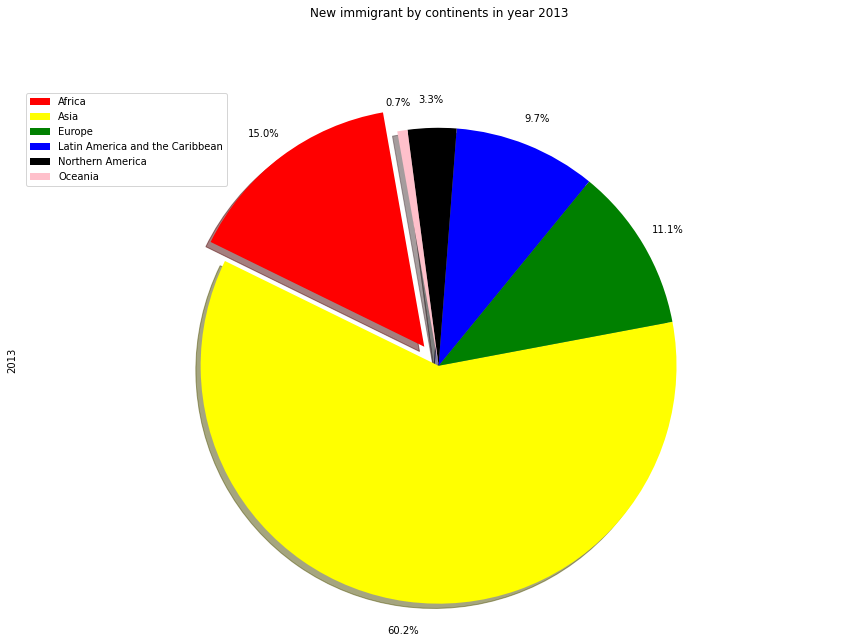

In [4]:
### type your answer here
df_continent2013 = df_can[["Continent", "2013"]]
df_continent2013 = df_continent2013.groupby('Continent', axis=0).sum()

#plot pie chart
df_continent2013["2013"].plot(kind="pie",
                                          figsize=(15,10),
                                          autopct="%1.1f%%",
                                          startangle=100,
                                          shadow=True,
                                          labels=None,
                                          pctdistance=1.12,
                                          explode= [0.1, 0, 0, 0, 0, 0],
                                          colors = ["red", "yellow", "green", "blue", "black", "pink"]
                                          )

#judul
plt.title('New immigrant by continents in year 2013', y=1.12)
plt.axis('equal')
plt.legend(labels=df_continent2013.index, loc='upper left')

#menampilkan pie chart
plt.show()



**Question 2:** Compare the distribution of the number of immigrants from Pakistan and Afghanistan from 1980 to 2013.

Step 1: Get the dataset for Pakistan and Afghanistan and call the dataframe **df_PA**.

In [5]:
### type your answer here
df_pakistan = df_can.loc[["Pakistan","Afghanistan"],years].transpose()
df_pakistan.describe()



Country,Pakistan,Afghanistan
count,34.000000,34.000000
mean,7105.882353,1724.676471
std,5315.849587,1196.705040
min,514.000000,16.000000
25%,1565.750000,762.750000
50%,7014.000000,1752.000000
75%,12259.000000,2615.000000
max,16708.000000,4067.000000


Step 2: Plot data.

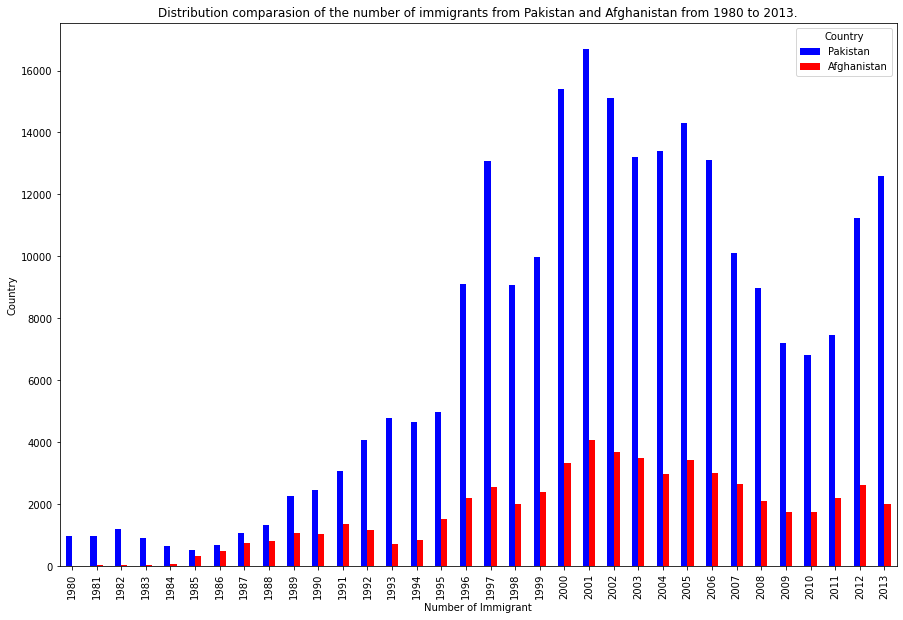

In [6]:
### type your answer here
#menggunakan bar chart
df_pakistan.plot(kind="bar", 
                 figsize=(15,10), 
                 color = ["blue", "red"]
                 )
 
 #judul
plt.xlabel("Number of Immigrant")
plt.ylabel("Country")
plt.title("Distribution comparasion of the number of immigrants from Pakistan and Afghanistan from 1980 to 2013.")
plt.show()




**Question 3**: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

Step 1: Get the data:
   1. Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it **df_countries**.
   2. Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe **df_total**.
   3. Reset the index in place.
   4. Rename the columns to **year** and **total**.
   5. Display the resulting dataframe.

In [7]:
### type your answer here
#1
df_country = df_can.loc[["Denmark", "Norway", "Sweden"], years]

#2
df_total = pd.DataFrame(df_country[years].sum(axis=0))

#3
df_total.index = map(int, df_total.index) #string -> int
df_total.reset_index(inplace=True)

#4
df_total.columns = ["year", "total"]

#5
df_total




,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252
5,1985,285
6,1986,336
7,1987,387
8,1988,373
9,1989,387


Step 2: Generate the scatter plot by plotting the total versus year in **df_total**.

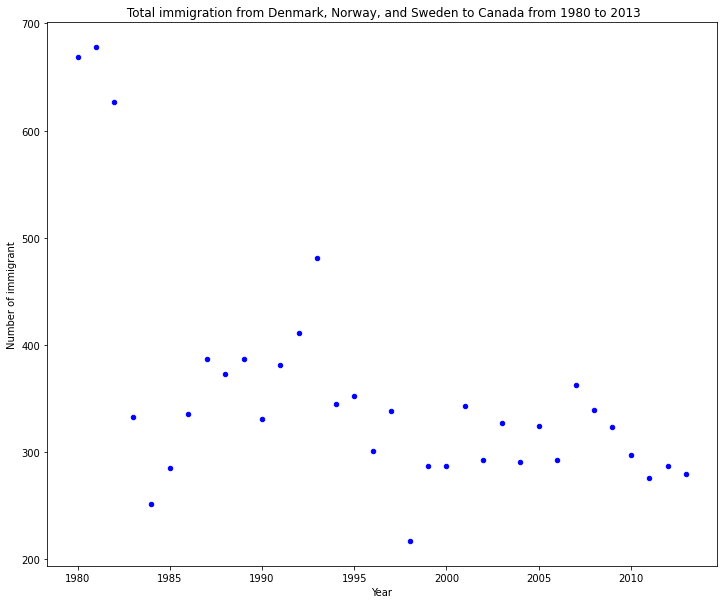

In [8]:
### type your answer here
#membuat scatter plot
df_total.plot(kind="scatter",
              figsize=(12,10),
              x="year",
              y= "total", 
              color = "blue")

#menambah label x dan y dan judul
plt.title(" Total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013")
plt.xlabel("Year")
plt.ylabel("Number of immigrant")

plt.show()





**Question 4**: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_can_t** that we defined and used in the previous example.

Step 1: Normalize the data pertaining to China and India.

In [9]:
### type your answer here
#transpose dataframe
df_can_t = df_can.loc[["China", "India"], years].transpose()

#jadiin int
df_can_t.index = map(int, df_can_t.index)

#buat label nama kolom
df_can_t.index.name = "Year"

#reset utk menjadikan tahun sebagai kolom
df_can_t.reset_index(inplace=True)

df_can_t.head()

#normalisasi data china
df_normalisasi_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

#normalisasi data india
df_normalisasi_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())





Step 2: Generate the bubble plots.

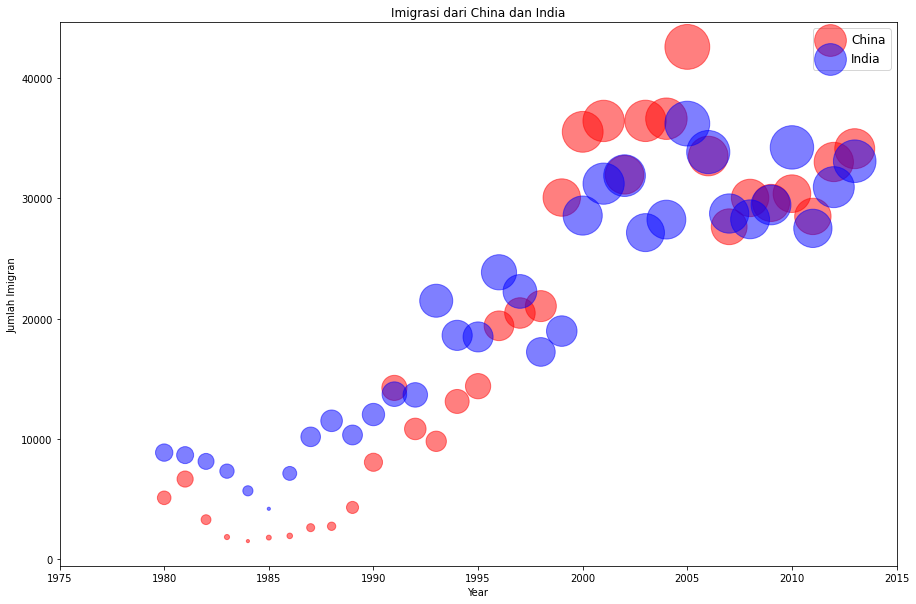

In [10]:
### type your answer here

### type your answer here
#China
ax0 = df_can_t.plot(kind = "scatter",
                    x = "Year",
                    y = "China",
                    alpha = 0.5,
                    color = "red",
                    figsize = (15, 10),
                    s = df_normalisasi_china * 2000 + 10, xlim = (1975, 2015)
                    )
#india
ax1 = df_can_t.plot(kind = "scatter",
                    x = "Year",
                    y = "India",
                    alpha = 0.5,
                    color = "blue",
                    figsize = (15, 10),
                    s = df_normalisasi_india * 2000 + 10, ax = ax0
                    )
ax0.set_ylabel("Jumlah Imigran")
ax0.set_title("Imigrasi dari China dan India")
ax0.legend(["China", "India"], loc = "upper right", fontsize = "large")




# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).